# Decision boundary

Calculate the decision boundary for agents in the R_V mechanism.

Variables:
- x-axis: waiting time of the adversary `w`
- y-axis: the influence on the utility factor `f` of the layers

Constants:
- Valuation `v`
- Base deposit `d`
- Payment `p`
- Cost `c`
- Discount factor `discount`
- Interest rate `r`
- Discount factor `d`
- Number of layers `l`


Assumptions:
- A single action always gets you to the next layer
- You get kicked out of the registry for performing a undesired action
- You can join the registry again after being kicked-out starting from the lowest layer
- Set the constants to a decision boundary
- The cost for performing either a desired or undesired action is the same

In [64]:
d = 100.0
p = d/10
v = 130
c = 1.0
r = 0.05
discount = 0.95


class Registry:
    def __init__(self, d, l, factor, v, p):
        self.deposit = dict()
        for i in reversed(range(l)):
            self.deposit[i] = d * (1 + (factor * (i + 1)))

In [65]:
# Actions
# 0 = desired
# 1 = undesired
# 2 = undecided

class Agent:
    def __init__(self, v, c, p, d, r, discount, w):
        self.valuation = v
        self.cost = c
        self.payment = p
        self.deposit = d
        self.interest = r
        self.discount = discount
        self.time = w
        
    def decision(self):
        undesired = self.valuation - self.cost - self.deposit - (self.interest * self.deposit)
        
        discount_factor = (self.discount/(1.0 + self.interest))**(self.time + 1.0)
        desired = discount_factor * (self.payment - self.cost) - discount_factor * self.interest * self.deposit
        
        if desired > undesired:
            action = 0
        elif undesired < desired:
            action = 1
        else:
            action = 2
        
        return action

In [66]:
deposit_ratio_base = []
window_base = []
decision_base = []

deposit_ratio_registry = []
window_registry = []
decision_registry = []

max_time_window = 200

# No mechanism is simply a single layer registry
factor_mod = [0.05, 0.1, 0.15, 0.2, 0.25] 
num_registry = 3


for factor in factor_mod:
    base = Registry(d, 1, factor, v, p)
    deposit_base = base.deposit[0]
    deposit_ratio_base.append(deposit_base)

    layer_3 = Registry(d, num_registry, factor, v, p)
    deposit_registry = layer_3.deposit[num_registry-1]
    deposit_ratio_registry.append(deposit_registry)
    
    window_round_base = []
    decision_round_base = []
    
    window_round_registry = []
    decision_round_registry = []
    
    for i in range(max_time_window):
        window_round_base.append(i+1)
        window_round_registry.append(i+1)
        
        base_agent = Agent(v, c, p, deposit_base, r, discount, i)
        registry_agent = Agent(v, c, p, deposit_registry, r, discount, i)
        
        action_base_agent = base_agent.decision()
        action_registry_agent = registry_agent.decision()
        
        decision_round_base.append(action_base_agent)
        decision_round_registry.append(action_registry_agent)
        
    window_base.append(window_round_base)
    window_registry.append(window_round_registry)

    decision_base.append(decision_round_base)
    decision_registry.append(decision_round_registry)

        
    

# Plot results

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

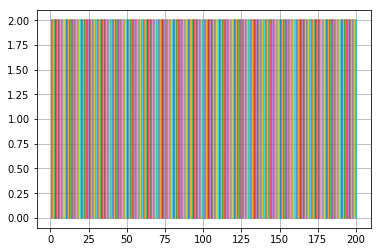

In [68]:
fig, ax = plt.subplots()

ax.plot(window_registry, decision_registry)

ax.grid()

plt.show()

In [73]:
print(decision_registry[1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Discrete plots

In [78]:
discount = 0.9
interest = 0.05
payment = 0.1
cost = 0.05
deposit = 1.0


min_w = 3
max_w = 100

ws = np.arange(min_w, max_w, dtype=float)
gammas = np.linspace(0., 3., 100)

base = np.ones(max_w-min_w)

values = []

def registry(ws, gammas):
    np.zeros(min_w,max_w)

    for w in ws:
        for gamma in gammas:
            value = (discount/(1 + interest)**(w+1))*(payment-cost)-(discount/(1 + interest)**(w+1))\
            *interest*gamma*deposit+cost+gamma*deposit+interest*gamma*deposit
# value = (0.9/(1 + 0.05)^(w+1))*(0.1-0.05)-(0.9/(1 + 0.05)^(w+1))*0.05*gamma*1.0+0.05+gamma*1.0+0.05*gamma*1.0
    

# Rho bounds

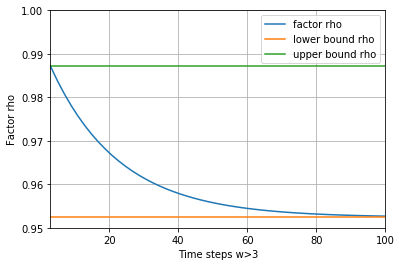

In [16]:
def rho(interest, discount, w):
    return (1/(1+interest-((discount/(1+interest)**(w+1)*interest))))

def rho_upper(interest, discount, w):
    return (1/(1+interest))

    
def rho_lower(interest, discount, w):
    return (1/(1+interest-((discount/(1+interest)**(4)*interest))))

interest = 0.05
discount = 0.9
w = np.linspace(3,100)
r = np.zeros(w.shape)
r_u = np.zeros(w.shape)
r_l = np.zeros(w.shape)

for i in range(len(w)):
    r[i] = rho(interest,discount,w[i])
    r_u[i] = rho_upper(interest,discount,w[i])
    r_l[i] = rho_lower(interest,discount,w[i])

fig, ax1 = plt.subplots()
ax1.plot(w, r, label='Factor f boundary')
ax1.plot(w, r_u, label='Lowest bound considering w = 3')
ax1.plot(w, r_l, label='Lowest bound consider w → ∞')


ax1.set(xlabel='Time steps with w > 2', ylabel='Factor f')

ax1.grid()

axes = plt.gca()
axes.set_xlim([3,100])
axes.set_ylim([0.95,1.0])

ax1.legend()

fig.savefig("figures/rho.png", dpi=600)
plt.show()